## Problem: Cheapest flights within k stops
LeetCode: 787

https://leetcode.com/problems/cheapest-flights-within-k-stops/description/

There are n cities connected by some number of flights. You are given an array flights where flights[i] = [fromi, toi, pricei] indicates that there is a flight from city fromi to city toi with cost pricei.

You are also given three integers src, dst, and k, return the cheapest price from src to dst with at most k stops. If there is no such route, return -1.

 

Example 1:

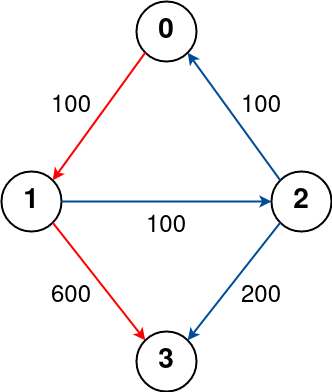

    Input: n = 4, flights = [[0,1,100],[1,2,100],[2,0,100],[1,3,600],[2,3,200]], src = 0, dst = 3, k = 1
    Output: 700
    Explanation:
    The graph is shown above.
    The optimal path with at most 1 stop from city 0 to 3 is marked in red and has cost 100 + 600 = 700.
    Note that the path through cities [0,1,2,3] is cheaper but is invalid because it uses 2 stops.
Example 2:


    Input: n = 3, flights = [[0,1,100],[1,2,100],[0,2,500]], src = 0, dst = 2, k = 1
    Output: 200
    Explanation:
    The graph is shown above.
    The optimal path with at most 1 stop from city 0 to 2 is marked in red and has cost 100 + 100 = 200.
Example 3:


    Input: n = 3, flights = [[0,1,100],[1,2,100],[0,2,500]], src = 0, dst = 2, k = 0
    Output: 500
    Explanation:
    The graph is shown above.
    The optimal path with no stops from city 0 to 2 is marked in red and has cost 500.
 

Constraints:

    1 <= n <= 100
    0 <= flights.length <= (n * (n - 1) / 2)
    flights[i].length == 3
    0 <= fromi, toi < n
    fromi != toi
    1 <= pricei <= 104
    There will not be any multiple flights between two cities.
    0 <= src, dst, k < n
    src != dst

## Approach : Use Dijkstra's Algorithm

If we observe, the problem is similar to finding the shortest path from a source cell to a destination cell. Here, the shortest path is the one with minimum absolute difference between every adjacent cells in that path. Also, since there is height associated with each cell, simple BFS traversal won't be sufficient.

The absolute difference between adjacent cells A and B can be perceived as the weight of an edge from cell A to cell B. Thus, we could use Dijkstra's Algorithm which is used to find the shortest path in a weighted graph with a slight modification of criteria for the shortest path.

In [3]:
## Time Complexity : O(m.n.log(m.n)), Space Complexity: O(m.n)
import heapq
def findCheapestPrice(n, flights, src, dst, k):
    adj = {}
    for flight in flights:
        s = flight[0]
        d = flight[1]
        cost = flight[2]
        if s not in adj:
            adj[s] = []
        adj[s].append((cost, d))
    
    stopList = [float("inf")] * n
    costList = [float("inf")] * n

    return dijkstra(adj, stopList, costList, src, dst, k)
        

def dijkstra(adj, stopList, costList, src, dst, k):
    stopList[src] = 0
    costList[src] = 0
    minHeap = []
    heapq.heappush(minHeap, (0, src, 0)) #cost, src, stop
    while minHeap:
        cost, s, stop = heapq.heappop(minHeap)
        if s == dst:
            return cost
        if s not in adj:
            continue
        if stop <= k:
            for pair in adj[s]:
                newCost, d = pair
                if costList[d] > newCost + cost or stop + 1 < stopList[d]:
                    stopList[d] = stop+1
                    costList[d] = newCost + cost
                    heapq.heappush(minHeap, (cost + newCost, d, stop + 1))
    return -1

In [4]:
n = 4
flights = [[0,1,100],[1,2,100],[2,0,100],[1,3,600],[2,3,200]]
src = 0
dst = 3
k = 1
findCheapestPrice(n, flights, src, dst, k)

700

In [5]:
n = 3
flights = [[0,1,100],[1,2,100],[0,2,500]]
src = 0
dst = 2
k = 0
findCheapestPrice(n, flights, src, dst, k)

500